Training image pixel intensities:


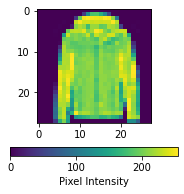

Training images(25):


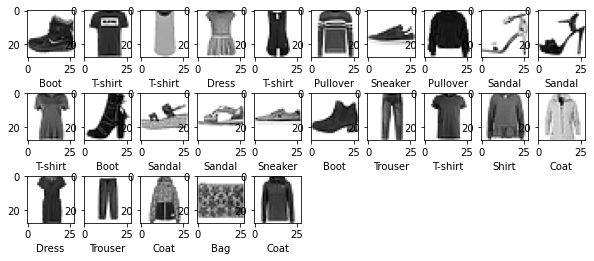

In [14]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

dataset = tf.keras.datasets.fashion_mnist
(tr_img, tr_lbl), (test_img, test_lbl) = dataset.load_data()

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
#print(tr_img.shape)
#print(te_img.shape)

print('Training image pixel intensities:')
plt.figure(figsize=(3, 3))
plt.imshow(tr_img[5000])
plt.colorbar(label="Pixel Intensity", orientation="horizontal")
plt.show()

#normalisation
tr_img = tr_img.astype('float32')
test_img = test_img.astype('float32')
tr_img = tr_img / (255.0)
test_img = test_img / (255.0)

print('Training images(25):')
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(10, 10, i+1)
    plt.grid(False)
    plt.imshow(tr_img[i], cmap=plt.cm.binary)
    plt.xlabel(labels[tr_lbl[i]])
plt.show()

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5602 - accuracy: 0.8023
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3994 - accuracy: 0.8563
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3568 - accuracy: 0.8704
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3338 - accuracy: 0.8814
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3156 - accuracy: 0.8867
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2981 - accuracy: 0.8920
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2861 - accuracy: 0.8963
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2764 - accuracy: 0.8986
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2637 - accuracy: 0.9027
Epoch 10/10
1875/1875 [==============================] - 29s 15m

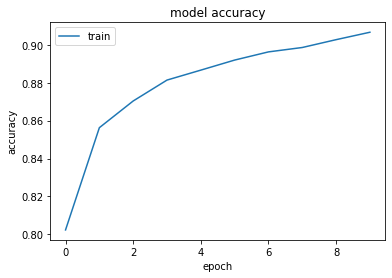

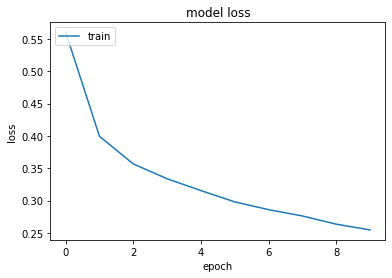

In [17]:
onehot = np.zeros((tr_lbl.shape[0],10))                                ##Onehotencoding only for categcrossentropy
for x in range(len(tr_lbl)):
  onehot[x, tr_lbl[x]] = 1

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', input_shape=(28*28,)))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

model.compile(optimizer='adam', loss='kl_divergence', metrics=['accuracy'])
history = model.fit(tr_img, onehot, epochs=10)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:


test_loss, test_acc = model.evaluate(test_img, onehot_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3458 - accuracy: 0.8858

Test accuracy: 0.8858000040054321
